---
layout: default
title: "Deep Learning - Softmax classifier"
categories: deeplearning
permalink: /ML32/
order: 32
comments: true
---

In [1]:
%pylab --no-import-all inline
from plot_ann import ann
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/marnec/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# ML strategy
This article aims at identify diagnose performance bottleneck and to find appropriate ways to build or improve a ML algorithm.

## Orthogonalization
In training a ML algorithm, it is important to know what to tune in order to achieve a certain effect. A status in which each hyper-parameters tune exactly one aspect of the model is a status of perfect **orthogonalization** and is a status that we would like to achieve.

In machine learning, the effects that you want to orthogonalize are:

1. Fit training set well on cost function (for some applications this means approaching human-level performance): e.g. tune by getting a bigger network
2. Fit dev set well on cost function: e.g. tune by getting a bigger training set
3. Fit test set well on cost function: e.g. tune by getting a bigger dev set
4. Performs well in real world: e.g. tune by changing cost function

An action that doesn't fit well with orthogonalization is early stopping (<a href="page:ML27">ML-27</a>), since it tries to simultaneously tunes train set and dev set performance.

## Satisficing and Optimizing metrics
We have talked in <a href="page:ML17">ML-17</a> about the importance of having a single real-number evaluation metric. However, it is not always easy to combine all the desired properties of a model in a single metric. In those cases it is useful to set satisficing and optimizing metrics.

Let's say that for an image classifier we care about the classification accuracy and about the running time. Suppose we have three classifiers as in the <a href="#satopt">the table below</a>

In [10]:
pd.DataFrame([['90%', '80ms'], ['92%', '95ms'], ['95%', '1500ms']], columns=['Accuracy', 'Running time'], index=list('ABC'))\
.style.set_caption('Three classifiers and their accuracies and running times').set_table_attributes('id="satopt"')

,Accuracy,Running time
A,90%,80ms
B,92%,95ms
C,95%,1500ms


We may set some rules that we want models to be subject to:

* maximize accuracy
* running time $\leq 100 \mathrm{ms}$

In this case accuracy is an optimizing metric because we want to get as good as possible on this metric, while running-time is a satisficing metric because we want to have at least a certain running-time. In general, if we decide that we care about $N$ metrics, we should have 1 optimizing metric and $N-1$ satisficing metrics.

##  Human level performance
Deep-learning applications are often compared with human-level performance. First, because ML is become so advanced that can perform as well or better than human-level performance. Second, because it turns out that the model workflow is much more efficient when the algorithm is trying to do something that also humans can do. In those settings, it becomes natural to compare with human-level performance

Typically, when designing a ML model, performance will rapidly increase at first, approach and surpass human level performance and then asymptotically approach an ideal performance, called **Bayes optimal error**, which is the best theoretical function mapping $x \to y$, that can never be surpassed.

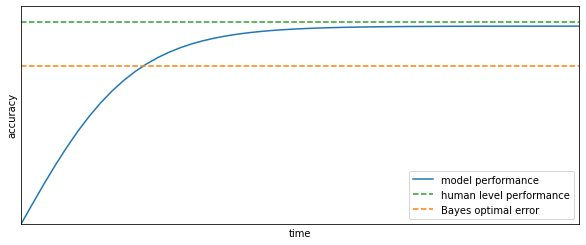

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(0, 10)
y = 1/(1+np.e**-x)

ax.plot(x, y, label='model performance')
ax.axhline(1.01, ls='--', c='C2', label='human level performance')
ax.axhline(0.9, ls='--', c='C1', label='Bayes optimal error')
ax.legend()
ax.set_xticks([])
ax.set_xlabel('time')
ax.set_yticks([])
ax.set_xlim(0, 10)
ax.set_ylim(0.5, 1.05)
ax.set_ylabel('accuracy');

<i id="fig:pertrend">Typical trend of performance of a trained model with human level performance and Bayes optimal performance.</i>

Interestingly, usually performance increase, really slows down after surpassing human-level performance. This happens for (at least) two reasons:

* Human level performance is, for many tasks, very close to Bayes optimal error
* So long as ML is worse than humans there are certain things that we can do to improve performance:
    * get labeled data from humans
    * gain insight from manual error analysis (why did a person get this right?)
    * better analysis of bias/variance (<a href="page:ML25">ML25</a>)